In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline

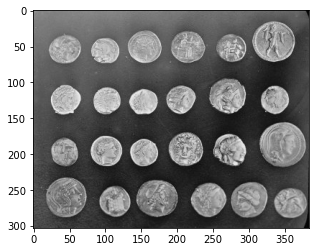

In [2]:
coins = data.coins()
plt.imshow(coins,cmap='gray')

# Segmentação baseada em agrupamento (K-Means)

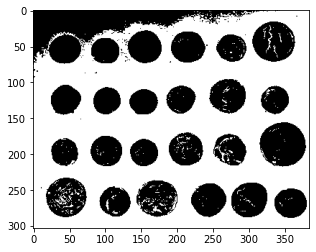

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0).fit(np.reshape(coins,(-1, 1)))
segmented = model.predict(np.reshape(coins,(-1, 1)))
segmented = np.reshape(segmented,(coins.shape[0],coins.shape[1]))
plt.imshow(segmented,cmap='gray')

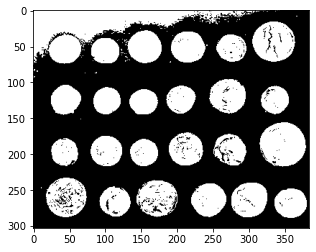

In [4]:
#Invertendo o fundo da imagem
segmented = 1 - segmented
plt.imshow(segmented,cmap='gray')

# Preenchendo as regiões detectadas

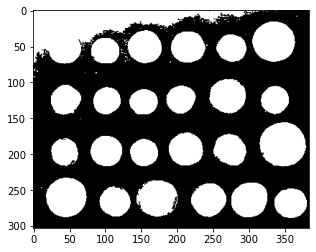

In [5]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(segmented) # Preenche os buracos de regiões fechadas de imagens binárias
plt.imshow(fill_coins,cmap='gray')

# Remoção de pequenas regiões segmentadas de ruído

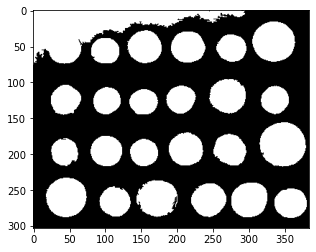

In [6]:
number_of_pixels = 150 #As regioes que tiverem menos de 150 pixels serão removidas
label_objects, nb_labels = ndi.label(fill_coins) #Criando labels com as diferentes regiões da imagem
new_image = np.zeros((label_objects.shape[0],label_objects.shape[1])) #Criando a nova imagem que receberá o resultado
for i in range(1,nb_labels):
    quant = np.sum(label_objects[:] == i) #Calculando o número de pixels da região de label i
    if(quant > number_of_pixels): #Fazendo a limiarização para remover as regiões com menos pixels que a variável
        new_image[label_objects[:] == i] = 1 #Os pixels da nova imagem receberão valor 1 nas posições que a região possui label igual a i
plt.imshow(new_image,cmap='gray')

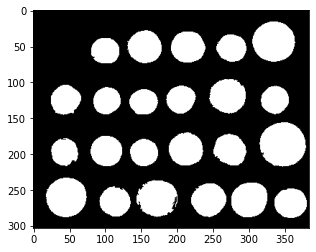

In [8]:
number_of_pixels = 9000 #As regioes que tiverem mais de 9000 pixels serão removidas
label_objects, nb_labels = ndi.label(new_image) #Criando labels com as diferentes regiões da imagem
new_image2 = np.zeros((label_objects.shape[0],label_objects.shape[1])) #Criando a nova imagem que receberá o resultado
for i in range(1,nb_labels+1):
    quant = np.sum(label_objects[:] == i) #Calculando o número de pixels da região de label i
    if(quant < number_of_pixels): #Fazendo a limiarização para remover as regiões com menos pixels que a variável
        new_image2[label_objects[:] == i] = 1 #Os pixels da nova imagem receberão valor 1 nas posições que a região possui label igual a i
plt.imshow(new_image2,cmap='gray')